[2.09909062 2.97246904 1.78229814 ... 1.78706674 2.167302   3.25473495]
[0.65608848 2.4871321  2.87717692 ... 1.51244248 1.79590082 4.47287543]
2.1294671296090195
2.1294671296090195


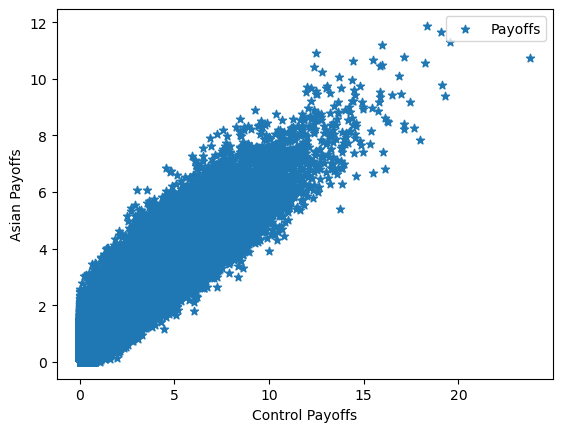

0.8992847084056665
Control variate price estimate
2.1294500729896915
Variance ratio of payoffs (varAsianPayoff/Var(Y))
5.227746427351308


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs
n = 100000
T = 2
M = 5
sigma = 0.25
k = 4
r = 0.04
S0 = 6

# Simulation of GBM
Z = np.random.normal(0, 1, size=(n, M))
S = np.exp(
    np.cumsum((r - 0.5 * (sigma ** 2)) * (T / M) + sigma * np.sqrt(T / M) * Z, axis=1)
    + np.log(S0)
)

# Option payoffs
Asian_Payoffs = np.exp(-r * T) * np.maximum(np.mean(S, axis=1) - k, 0)
Control_Payoffs = np.exp(-r * T) * np.maximum(S[:, -1] - k, 0)
print(Asian_Payoffs)
print(Control_Payoffs)

# Estimate prices by crude Monte Carlo
Asian_PriceEst = np.mean(Asian_Payoffs)
Control_PriceEst = np.mean(Control_Payoffs)
print(Asian_PriceEst)

# Price est using control variate
#print('CMC price estimate')
print(Asian_PriceEst)

# Plots payoffs to show correlation
plt.scatter(Control_Payoffs, Asian_Payoffs, marker='*', label='Payoffs')
plt.xlabel('Control Payoffs')
plt.ylabel('Asian Payoffs')
plt.legend()
plt.show()

# Control mean (Calculated using Black-Scholes)
d1 = (1 / (sigma * np.sqrt(T))) * (np.log(S0 / k) + (r + 0.5 * sigma ** 2) * T)
d2 = d1 - sigma * np.sqrt(T)
Control_Mean = norm.cdf(d1) * S0 - norm.cdf(d2) * k * np.exp(-r * T)

# Calculates Y_i's
covariance = np.cov([Asian_Payoffs, Control_Payoffs], ddof=0)
alfa = -covariance[0, 1] / covariance[1, 1]
Y = Asian_Payoffs + alfa * (Control_Payoffs - Control_Mean)

# Prints correlation coefficient
#print('Correlation of payoffs')
rho = np.corrcoef(Asian_Payoffs, Control_Payoffs)[0, 1]
print(rho)

# Price est using control variate
print('Control variate price estimate')
print(np.mean(Y))

# Checks variances
print('Variance ratio of payoffs (varAsianPayoff/Var(Y))')
var_ratio = np.var(Asian_Payoffs) / np.var(Y)
print(var_ratio)
